In [1]:
%matplotlib widget
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML  
import matplotlib
from scipy.integrate import trapezoid

In [2]:
#Задача 1 
normal_dist = np.random.normal(0,1,size=(1000))

In [3]:
def create_wiener(dt,t):
    norm_dist = np.random.normal(0,1,size =(1000))
    N= int(t/dt)
    Wt = np.zeros(len(normal_dist))
    for i in range(1,N):
        Wt[i] =  norm_dist[i]*np.sqrt(i*dt)
    return Wt


In [4]:
#Задача 2
W = create_wiener(0.004,4)

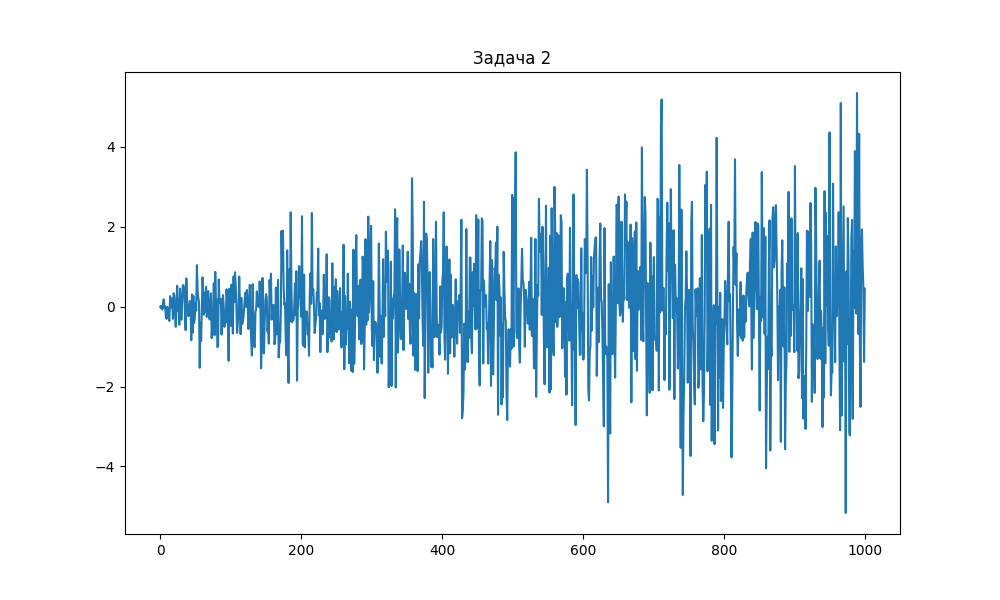

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(W)),W)
plt.title('Задача 2')
plt.show()

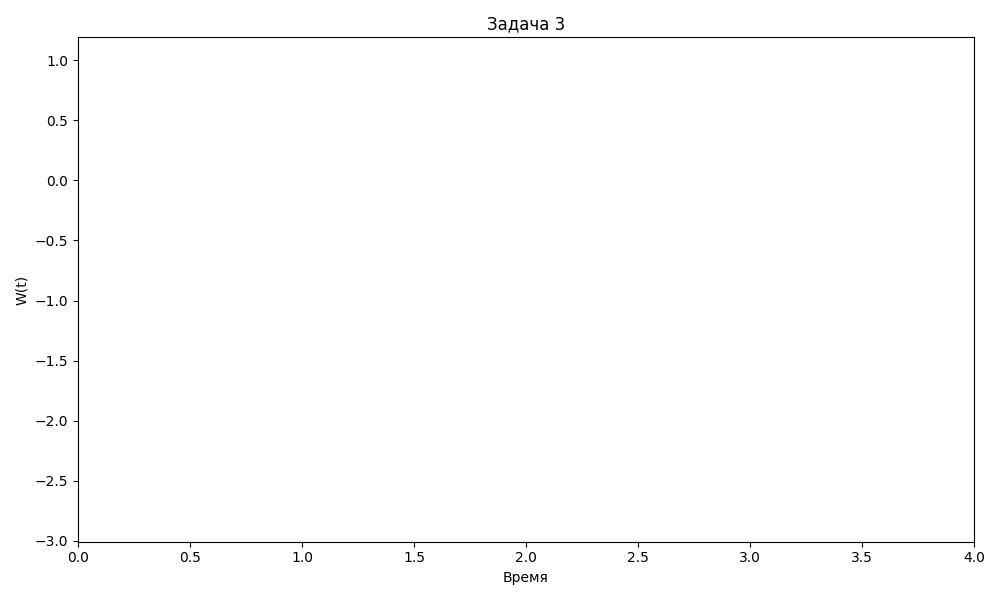

In [6]:
def create_wiener(t, n):
    dt = t / n
    increments = np.random.normal(0, np.sqrt(dt), size=n)
    W = np.cumsum(increments)
    return W


t = 4.0  
n = 1000  

W = create_wiener(t, n)
time = np.linspace(0, t, n)


fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0, t)
ax.set_ylim(np.min(W) - 0.5, np.max(W) + 0.5)
ax.set_xlabel('Время')
ax.set_ylabel('W(t)')
ax.set_title('Задача 3')
line, = ax.plot([], [], 'b-', lw=1.5)


def init():
    line.set_data([], [])
    return line,


def update(frame):
    x = time[:frame]
    y = W[:frame]
    line.set_data(x, y)
    

    if frame > 0:
        current_min, current_max = np.min(y), np.max(y)
        ax.set_ylim(current_min - 0.5, current_max + 0.5)
    
    return line,


ani = FuncAnimation(
    fig=fig,
    func=update,
    frames=n + 1,
    init_func=init,
    interval=10,  
    blit=True,
    repeat=False
)

plt.tight_layout()
plt.show()

In [7]:
def mu(t):
    return 0.1 * t

def sigma(t):
    return (6 + 2*t)/100  #0.06 + 0.02t

def runge_kutta_sde(T=4, n=1000, s0=10):
    h = T/n
    t = np.linspace(0, T, n+1)
    s_rk4 = np.zeros(n+1)
    s_rk4[0] = s0
    
    for i in range(n):
        current_t = t[i]
        current_s = s_rk4[i]
        

        dW = np.sqrt(h) * np.random.standard_normal()
        
 
        a1 = mu(current_t) * current_s
        a2 = mu(current_t + h/2) * (current_s + h/2 * a1)
        a3 = mu(current_t + h/2) * (current_s + h/2 * a2)
        a4 = mu(current_t + h) * (current_s + h * a3)
        

        b1 = sigma(current_t) * current_s
        b2 = sigma(current_t + h/2) * (current_s + h/2 * a1 + np.sqrt(h)/2 * b1)
        b3 = sigma(current_t + h/2) * (current_s + h/2 * a2 + np.sqrt(h)/2 * b2)
        b4 = sigma(current_t + h) * (current_s + h * a3 + np.sqrt(h) * b3)
        

        deterministic = h/6 * (a1 + 2*a2 + 2*a3 + a4)
        stochastic = dW/6 * (b1 + 2*b2 + 2*b3 + b4)
        
        s_rk4[i+1] = current_s + deterministic + stochastic
    
    return t, s_rk4

In [8]:
t, s_rk4 = runge_kutta_sde()

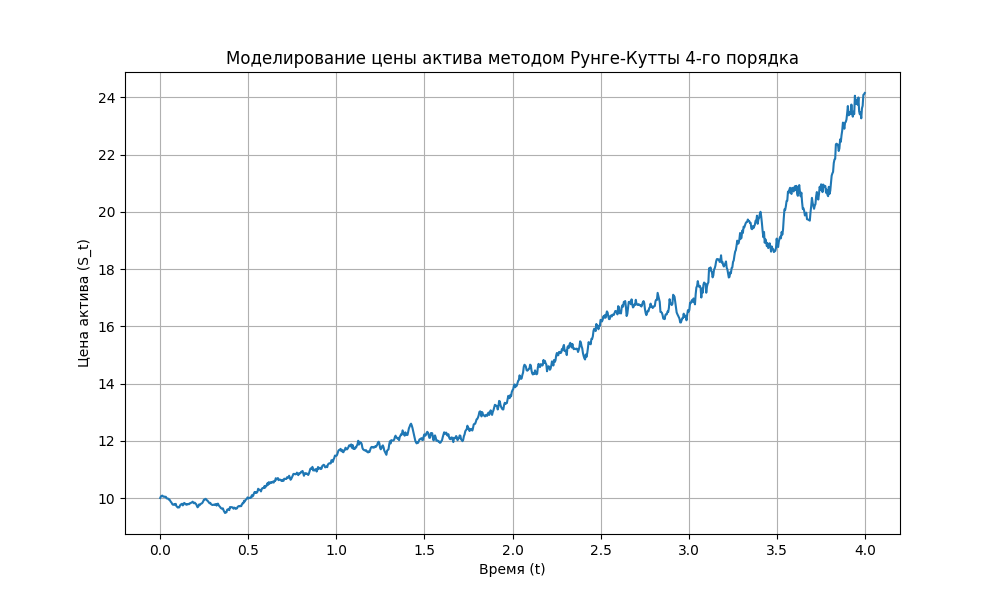

In [9]:
# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(t, s_rk4)
plt.title('Моделирование цены актива методом Рунге-Кутты 4-го порядка')
plt.xlabel('Время (t)')
plt.ylabel('Цена актива (S_t)')
plt.grid(True)
plt.show()

In [10]:
S0 = 10
T = 4
n_points = 1000
n_mc = 10000 
t_eval = np.arange(0.5, 4.5, 0.5) 
t_grid = np.linspace(0, T, n_points)

In [11]:
def compute_asset_price(S0=10, t_values=np.arange(0.5, 4.5, 0.5), n_mc=10000):

    results = []
    for t in t_values:
        t_grid = np.linspace(0, t, 1000)
        mu_vals = mu(t_grid)
        sigma_vals = sigma(t_grid)
        
        # Первый интеграл: метод трапеций
        integrand1 = mu_vals - 0.5 * sigma_vals**2
        int1 = trapezoid(integrand1, t_grid)
        
        # Второй интеграл: метод Монте-Карло
        dt = t_grid[1] - t_grid[0]
        dW = np.random.normal(0, np.sqrt(dt), size=(n_mc, len(t_grid)))
        int2 = np.mean(np.sum(sigma_vals * dW, axis=1))
        
        # Итоговая цена
        St = S0 * np.exp(int1 + int2)
        results.append(St)
    
    return results


t_points = np.arange(0.5, 4.5, 0.5)  # [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
prices = compute_asset_price(S0=10, t_values=t_points)


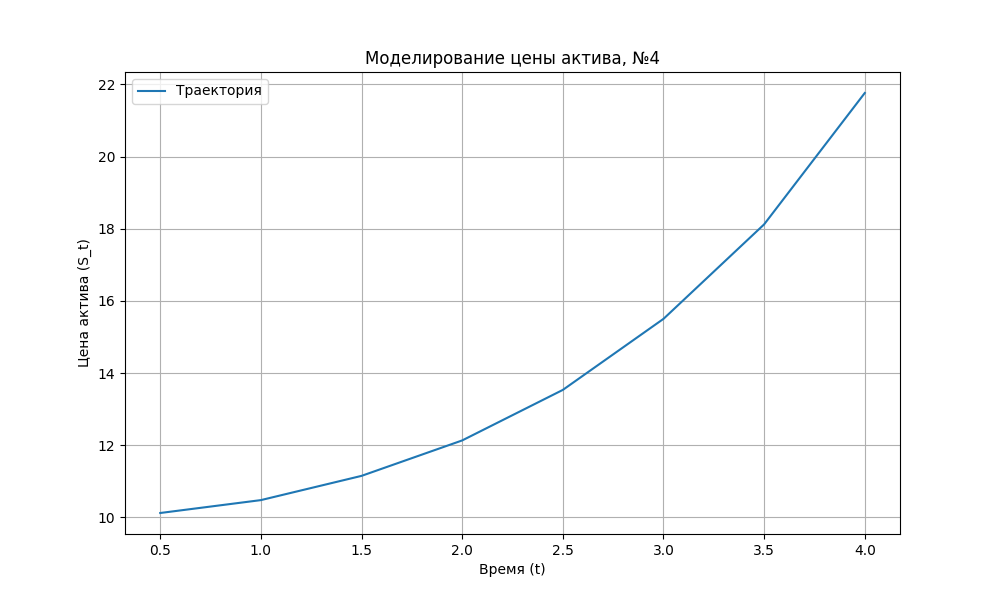

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(t_points, prices, label='Траектория')

plt.title('Моделирование цены актива, №4')
plt.xlabel('Время (t)')
plt.ylabel('Цена актива (S_t)')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
#Из графиков видно, что тренд цены в задачах 4 и 6 совпадают

In [17]:
def compute_asset_5 (t_values, S0 = 10, n_mc = 10000):
    S_results = []
    B_results = []
    
    for t in t_values:
        t_grid = np.linspace(0, t, 1000)
        mu_vals = mu(t_grid)
        sigma_vals = sigma(t_grid)
        

        int_B = trapezoid(mu_vals, t_grid)
        Bt = S0 * np.exp(int_B)
        B_results.append(Bt)
        

        integrand_S = mu_vals
        int1 = trapezoid(integrand_S, t_grid)
        
        dt = t_grid[1] - t_grid[0]
        dW = np.random.normal(0, np.sqrt(dt), size=(n_mc, len(t_grid)))
        int2 = np.mean(np.sum(sigma_vals * dW, axis=1))
        
        St = S0 * np.exp(int1 + int2)
        S_results.append(St)
    
    return np.array(S_results), np.array(B_results)

# Вычисление цен
  
t_points = np.arange(0.5, 4.5, 0.5)
get_b, _ = compute_asset_5(S0=10, t_values=t_points)

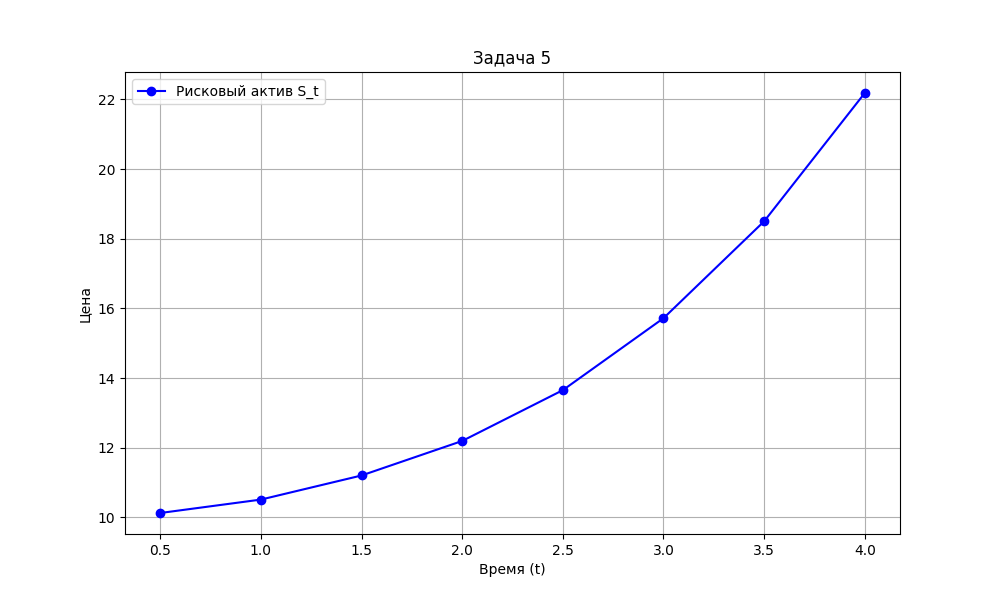

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(t_points, get_b, 'bo-', label='Рисковый актив S_t')
plt.title('Задача 5')
plt.xlabel('Время (t)')
plt.ylabel('Цена')
plt.legend()
plt.grid(True)
plt.show()